In [8]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [9]:
df= pd.read_csv ("employeePromotion.csv")
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
cols = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met', 'awards_won',
       'avg_training_score', 'is_promoted']
df.columns = cols

In [11]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met                   0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
df.previous_year_rating.value_counts(dropna=False)

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: count, dtype: int64

In [14]:

service_filter = df[df.length_of_service == 1]
print(
    "Null rating counts of employees with length of service 1\n",
    service_filter.previous_year_rating.isnull().sum()
)
print(
    "Null rating counts of employees with length of service 1 and promoted\n",
    service_filter[service_filter.is_promoted == 1].previous_year_rating.isnull().sum()
)
df.previous_year_rating = df.previous_year_rating.fillna(0)

Null rating counts of employees with length of service 1
 4124
Null rating counts of employees with length of service 1 and promoted
 339


In [15]:
df[df.education.isna()].is_promoted.value_counts()

is_promoted
0    2287
1     122
Name: count, dtype: int64

In [16]:
depts = df.department.unique()

for dept in depts:
    edu = df[df.department == dept].education.mode()[0]
    print(dept," : ",edu)

Sales & Marketing  :  Bachelor's
Operations  :  Bachelor's
Technology  :  Bachelor's
Analytics  :  Bachelor's
R&D  :  Bachelor's
Procurement  :  Bachelor's
Finance  :  Bachelor's
HR  :  Bachelor's
Legal  :  Bachelor's


In [17]:
df.education = df.education.fillna(df.education.mode()[0])

In [18]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met                    2
awards_won                  2
avg_training_score         61
is_promoted                 2
dtype: int64

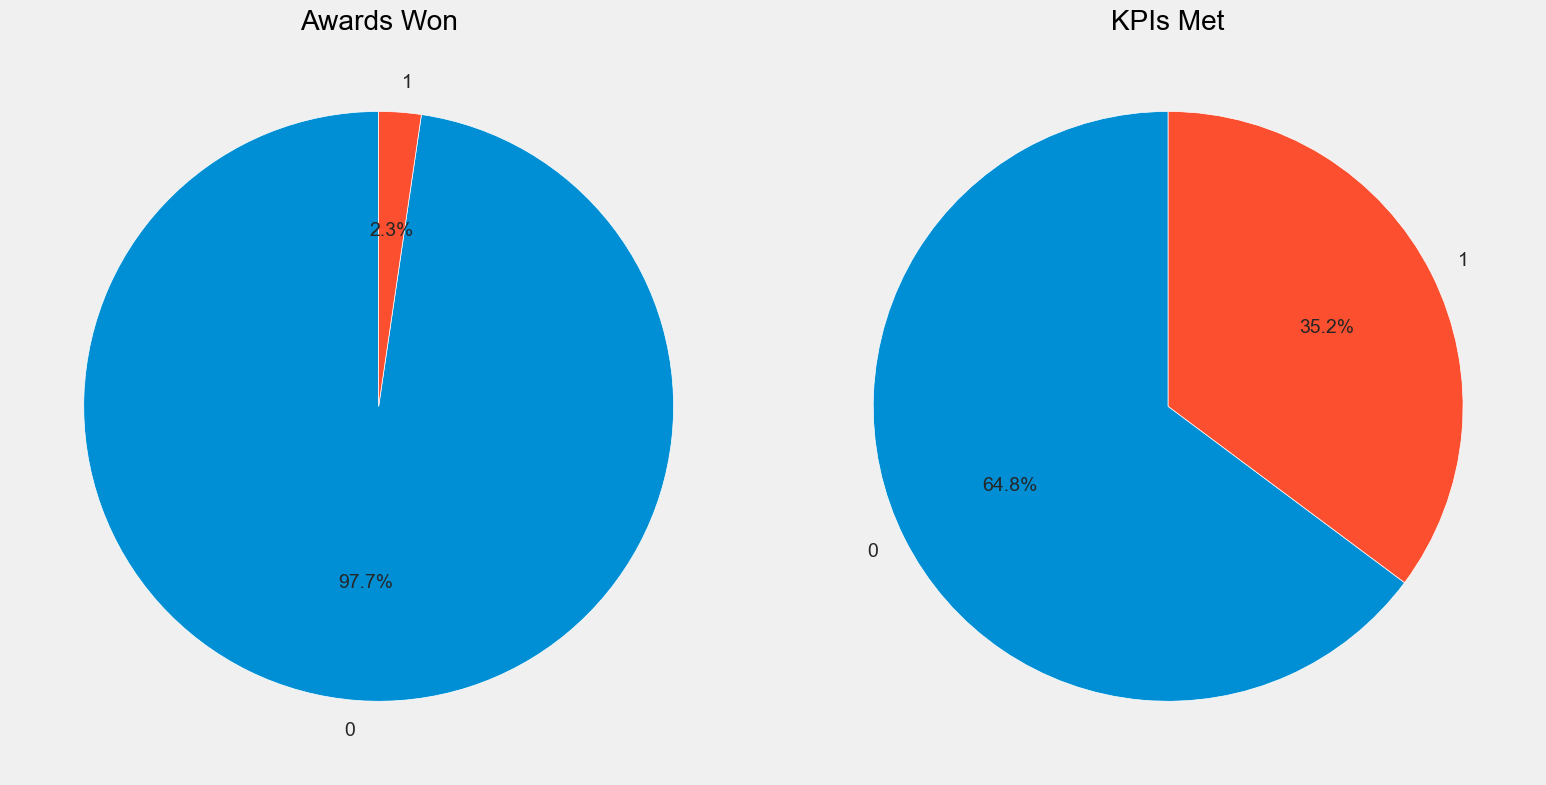

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the column names exist in the DataFrame
if 'awards_won' in df.columns and 'KPIs_met' in df.columns:
    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.set_style('dark')

    # Pie chart for 'awards_won'
    awards_won_counts = df['awards_won'].value_counts()
    axes[0].pie(awards_won_counts, labels=awards_won_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title('Awards Won')

    # Pie chart for 'KPIs_met'
    KPIs_met_counts = df['KPIs_met'].value_counts()
    axes[1].pie(KPIs_met_counts, labels=KPIs_met_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('KPIs Met')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\2987833753.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


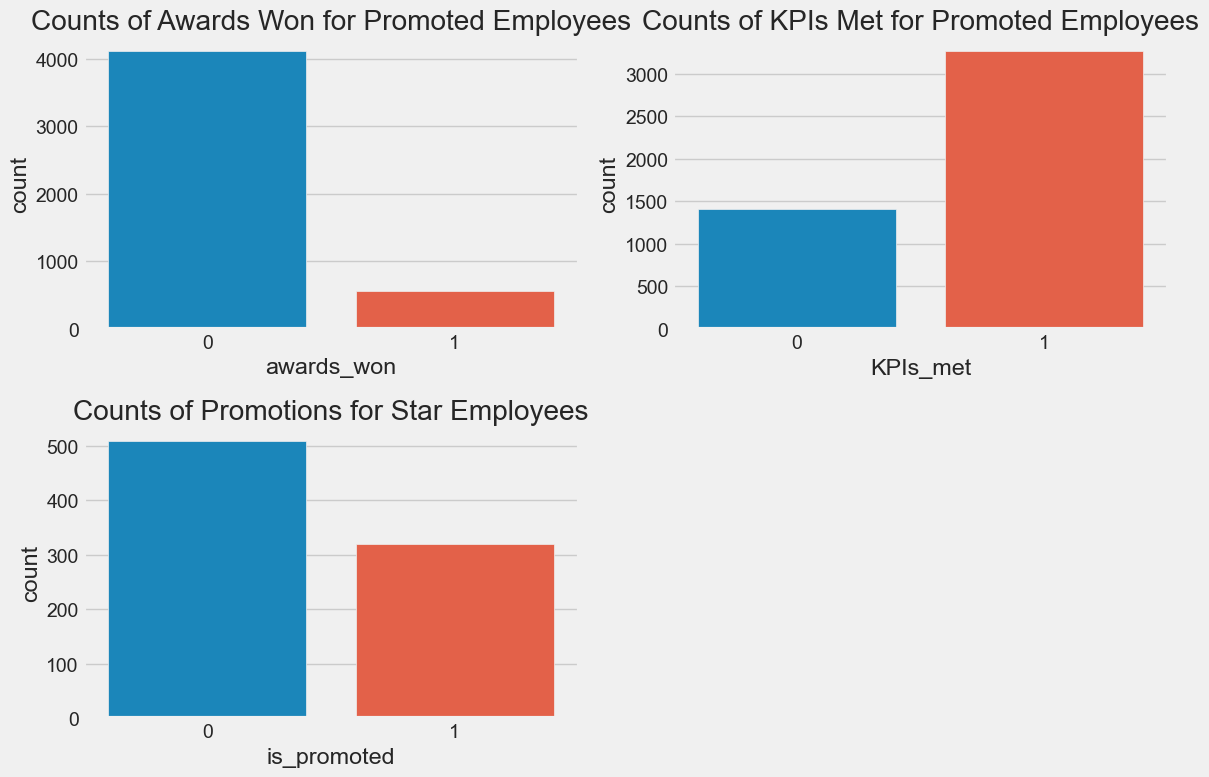

In [20]:
star_emps = df[(df['KPIs_met'] == 1) & (df['awards_won'] == 1)]

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df[df['is_promoted'] == 1], x='awards_won')
plt.title('Counts of Awards Won for Promoted Employees')

plt.subplot(2, 2, 2)
sns.countplot(data=df[df['is_promoted'] == 1], x='KPIs_met')
plt.title('Counts of KPIs Met for Promoted Employees')

plt.subplot(2, 2, 3)
sns.countplot(data=star_emps, x='is_promoted')
plt.title('Counts of Promotions for Star Employees')

plt.tight_layout()
plt.show()



C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\3115329527.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


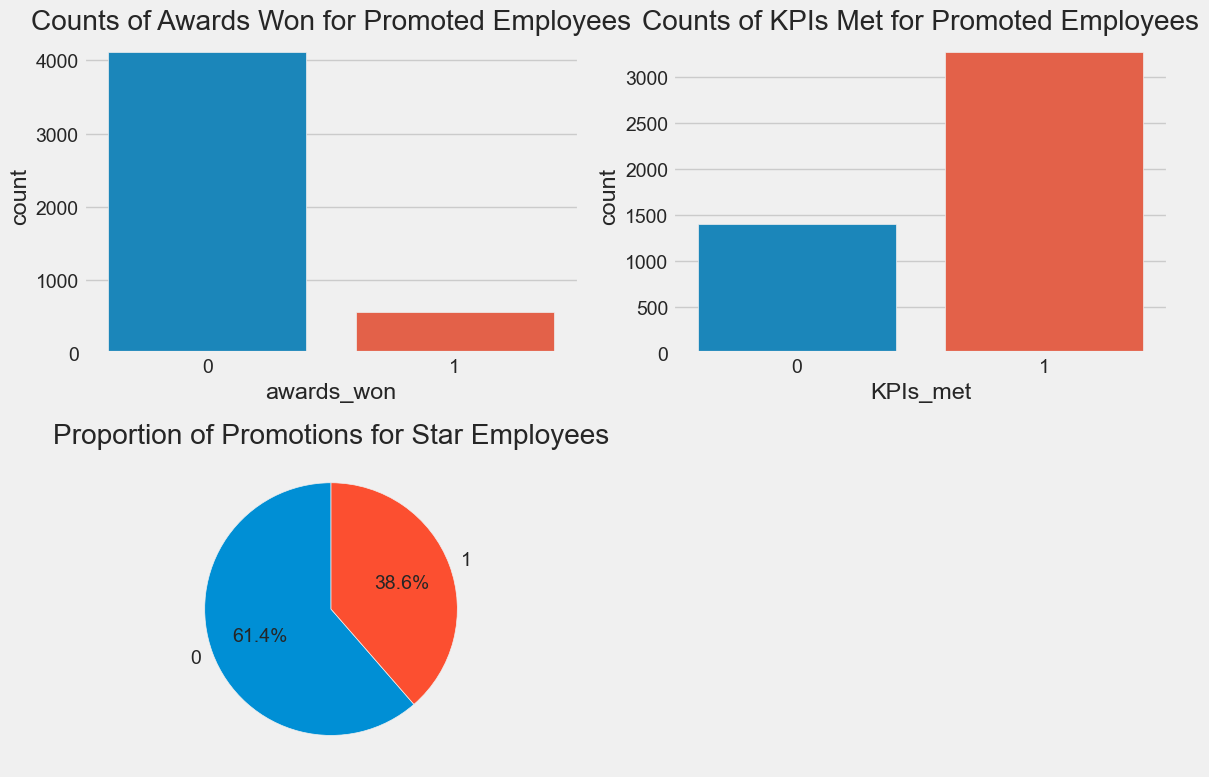

In [21]:
star_emps = df[(df['KPIs_met'] == 1) & (df['awards_won'] == 1)]

plt.style.use('fivethirtyeight')
plt.subplots(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(data=df[df['is_promoted'] == 1], x='awards_won')
plt.title('Counts of Awards Won for Promoted Employees')

plt.subplot(2, 2, 2)
sns.countplot(data=df[df['is_promoted'] == 1], x='KPIs_met')
plt.title('Counts of KPIs Met for Promoted Employees')

plt.subplot(2, 2, 3)
star_emps_promotions = star_emps['is_promoted'].value_counts()
plt.pie(star_emps_promotions, labels=star_emps_promotions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Promotions for Star Employees')

plt.tight_layout()
plt.show()


C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\408376929.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


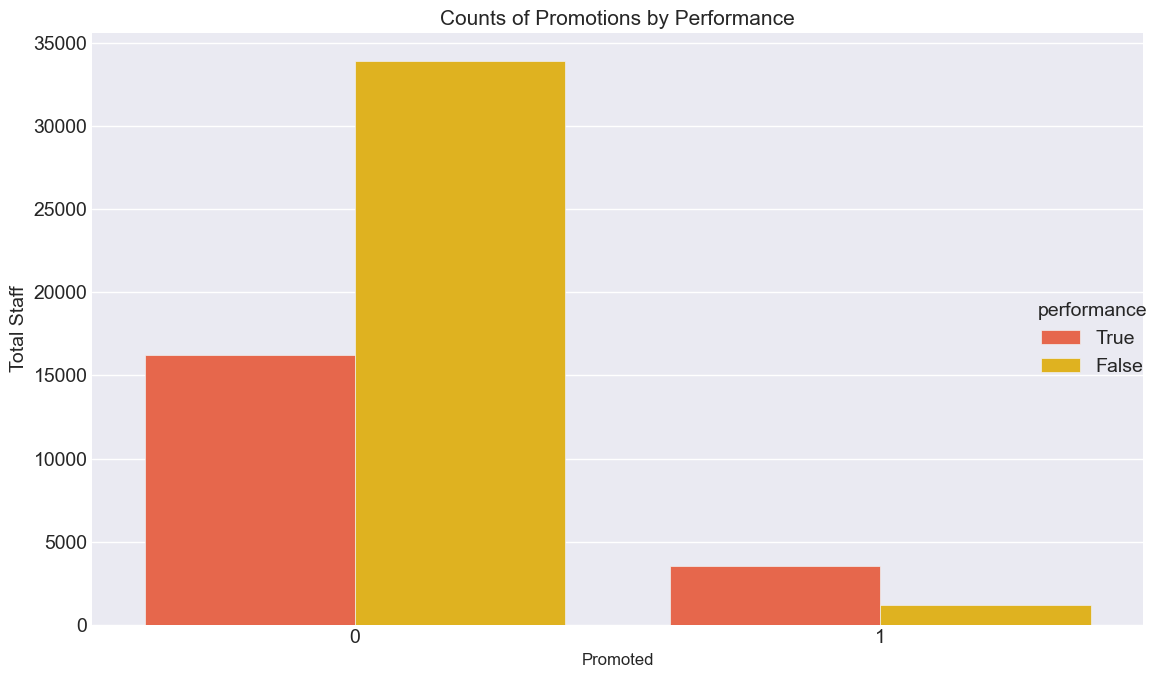

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df['performance'] = df[['KPIs_met', 'awards_won']].any(axis=1, skipna=False)

# Define custom color palette
custom_palette = ['#FF5733', '#FFC300']  # Example colors, you can change them as needed

# Set the plotting style
plt.style.use('seaborn-darkgrid')

# Create the catplot with customized parameters
sns.catplot(data=df, x='is_promoted', hue='performance', kind='count', palette=custom_palette,
            height=7, aspect=1.5, hue_order=[True, False])

# Set labels and title
plt.xlabel('Promoted', fontsize=12)
plt.ylabel('Total Staff', fontsize=14)
plt.title('Counts of Promotions by Performance', fontsize=15)

plt.tight_layout()
plt.show()


In [23]:
df.gender.value_counts(normalize=True)

gender
m    0.702379
f    0.297621
Name: proportion, dtype: float64

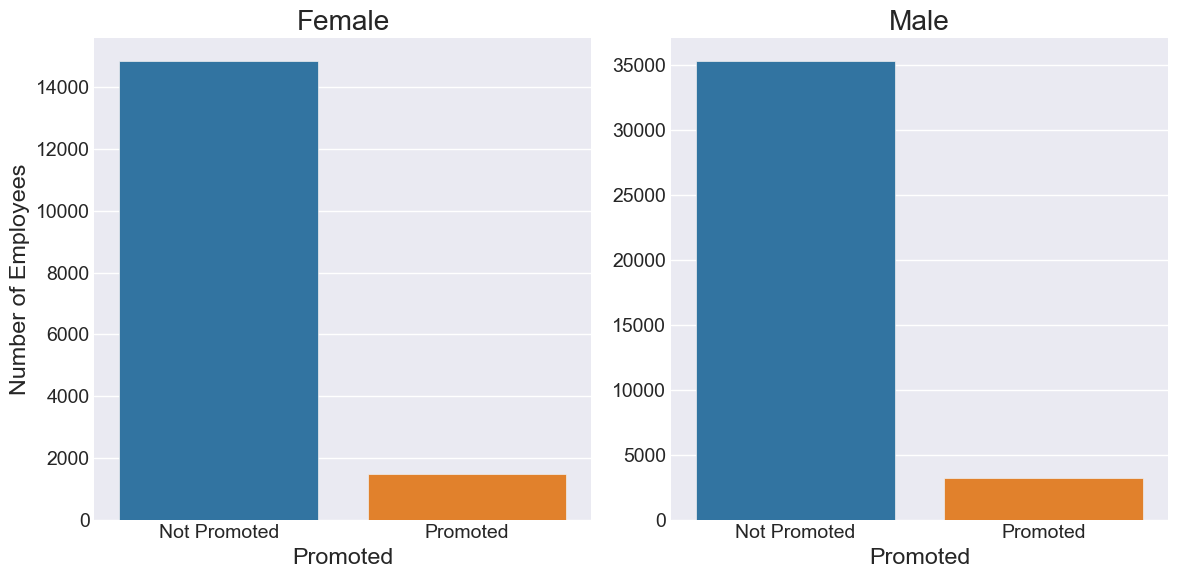

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for not promoted and promoted categories
colors = ['#1f77b4', '#ff7f0e']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Female
sns.countplot(x='is_promoted', data=df[df['gender'] == 'f'], ax=axes[0], palette=colors)
axes[0].set_title('Female')
axes[0].set_xlabel('Promoted')
axes[0].set_ylabel('Number of Employees')
axes[0].set_xticklabels(['Not Promoted', 'Promoted'])  # Set x-axis labels
axes[0].tick_params(axis='x', length=0)  # Remove x-axis ticks

# Plot for Male
sns.countplot(x='is_promoted', data=df[df['gender'] == 'm'], ax=axes[1], palette=colors)
axes[1].set_title('Male')
axes[1].set_xlabel('Promoted')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Promoted', 'Promoted'])  # Set x-axis labels
axes[1].tick_params(axis='x', length=0)  # Remove x-axis ticks

plt.tight_layout()
plt.show()


In [25]:
df['total_score'] = df.no_of_trainings * df.avg_training_score
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73


In [26]:
df['total_score_label'] = pd.cut(df.total_score,bins=[0,65,145,1000],labels=['Low','Mediocre','High'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre


In [27]:
scores = df.pivot_table(values='is_promoted',index='total_score_label')
scores


,is_promoted
total_score_label,
Low,0.057549
Mediocre,0.117858
High,0.097444


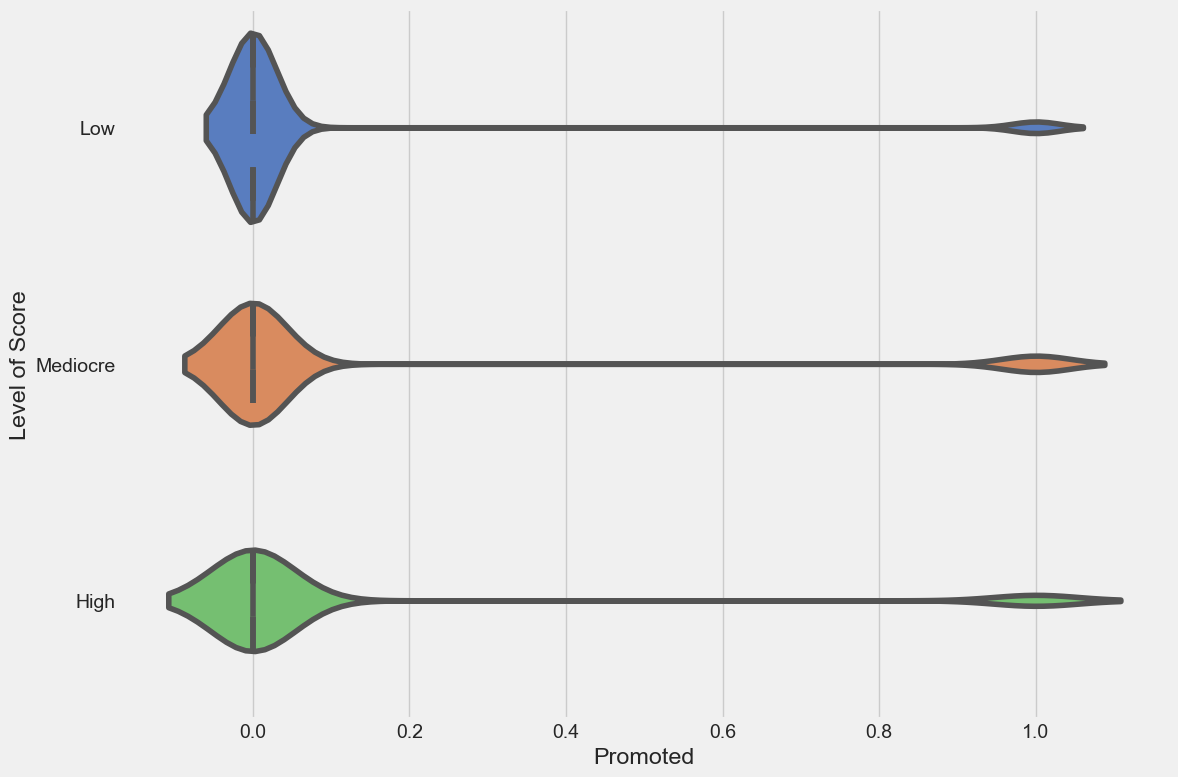

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
plt.style.use('fivethirtyeight')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='is_promoted',
    y='total_score_label',
    data=df,
    palette='muted',
    inner='quartile'
)

# Set labels
plt.xlabel('Promoted')
plt.ylabel('Level of Score')

plt.tight_layout()
plt.show()


In [29]:
df['service_catg'] = pd.cut(
    df.length_of_service,
    bins=[0,2,7,10,37],
    labels=['New','Established','Experienced','Veteran']
)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New


In [30]:
service = df.pivot_table(values='is_promoted',index='service_catg')
service

,is_promoted
service_catg,
New,0.086546
Established,0.084940
Experienced,0.091110
Veteran,0.075943


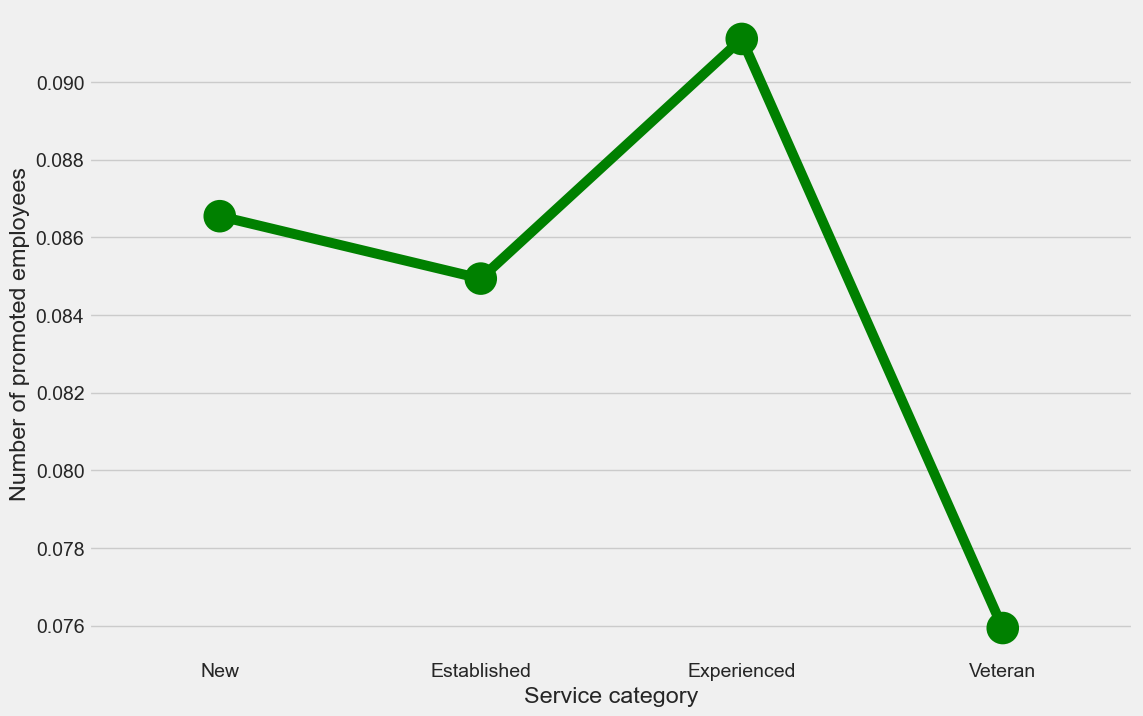

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.pointplot(
    x=service.index,
    y=service.values.flatten(),  # Convert the 2D array to 1D
    markers='o',  # Set marker style to circles
    linestyles='-',
    color='green',  # Set color to green
)
plt.ylabel('Number of promoted employees')
plt.xlabel('Service category')
plt.show()


In [32]:
df['age_label'] = pd.cut(df.age,bins=[0,25,40,50,100],labels=['Young','Middle','Senior','Elder'])
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior


In [33]:
ages = df.pivot_table(values='is_promoted',index='age_label')
ages

,is_promoted
age_label,
Young,0.066357
Middle,0.090173
Senior,0.072727
Elder,0.066971


C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\2944237671.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


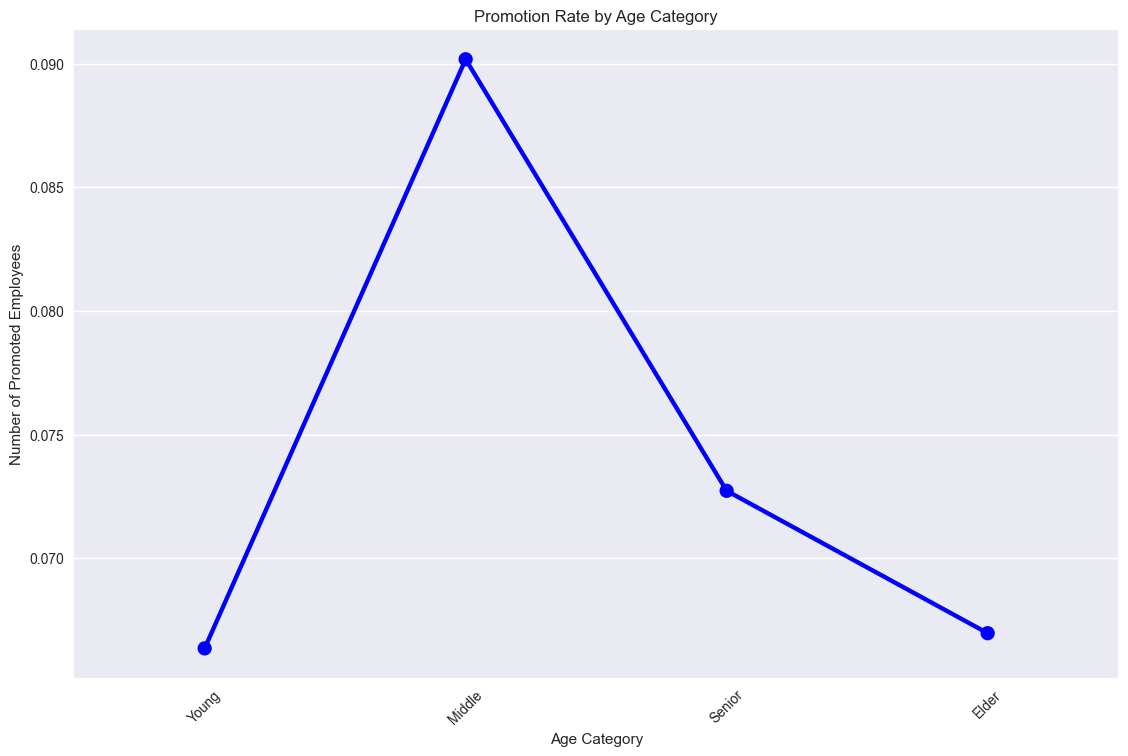

In [34]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
sns.pointplot(x=ages.index, y=ages['is_promoted'], color='blue', markers='o', linestyles='-')
plt.ylabel('Number of Promoted Employees')
plt.xlabel('Age Category')
plt.title('Promotion Rate by Age Category')
plt.xticks(rotation=45)
plt.show()


In [35]:
new_emps = df[df.service_catg == 'New']

new_age = new_emps.pivot_table(values='is_promoted',index='age_label')
new_age

,is_promoted
age_label,
Young,0.066873
Middle,0.093564
Senior,0.084112
Elder,0.000000


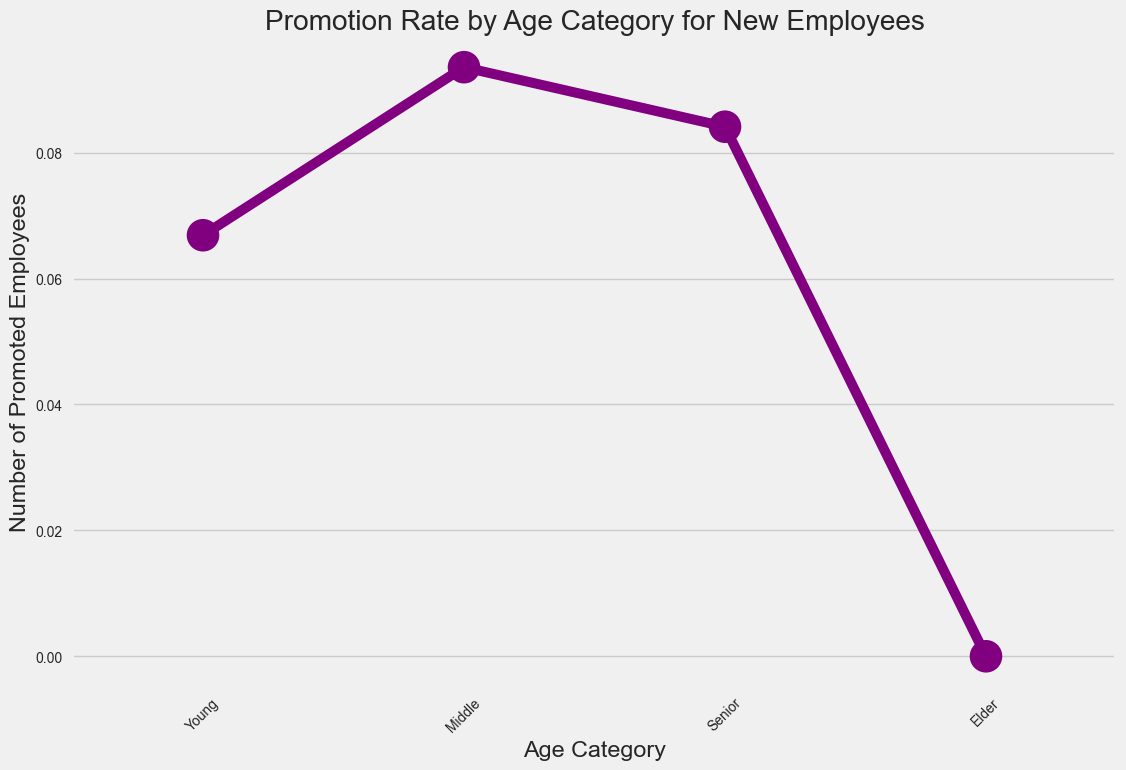

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.pointplot(x=new_age.index, y=new_age['is_promoted'], color='purple', markers='o', linestyles='-')
plt.ylabel('Number of Promoted Employees')
plt.xlabel('Age Category')
plt.title('Promotion Rate by Age Category for New Employees')
plt.xticks(rotation=45)
plt.show()



In [37]:
def decode(val):
    if val == 0:
        return 'New'
    elif val == 1:
        return 'Minimum'
    elif val == 2:
        return 'Fair'
    elif val == 3:
        return 'Improving'
    elif val == 4:
        return 'Good'
    else:
        return 'Very good'
    
df['rating_label'] = df.previous_year_rating.apply(decode)
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met,awards_won,avg_training_score,is_promoted,performance,total_score,total_score_label,service_catg,age_label,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,True,49,Low,Experienced,Middle,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,False,60,Low,Established,Middle,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,False,50,Low,Established,Middle,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,False,100,Mediocre,Experienced,Middle,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,False,73,Mediocre,New,Senior,Improving


In [38]:
ratings = df.pivot_table(values='is_promoted',index='rating_label')
ratings

,is_promoted
rating_label,
Fair,0.042840
Good,0.079376
Improving,0.072779
Minimum,0.014141
New,0.082202
Very good,0.163615


C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\2616817901.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


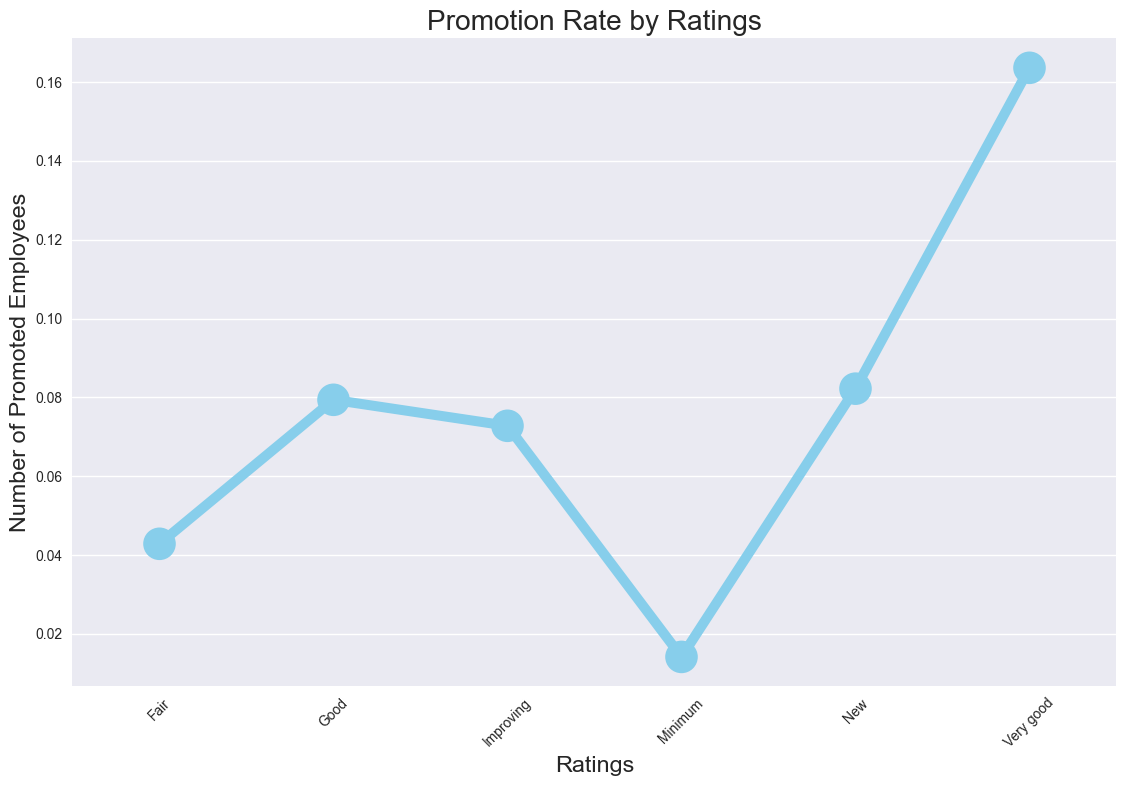

In [39]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 8))
sns.pointplot(
    x=ratings.index,
    y=ratings['is_promoted'],
    color='skyblue',  # Change color to sky blue
    markers='o',  # Use circles as markers
    linestyles='-'
)
plt.ylabel('Number of Promoted Employees')
plt.xlabel('Ratings')
plt.title('Promotion Rate by Ratings')
plt.xticks(rotation=45)
plt.show()


C:\Users\SAGEDUR RAHMAN\AppData\Local\Temp\ipykernel_4472\4244913242.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


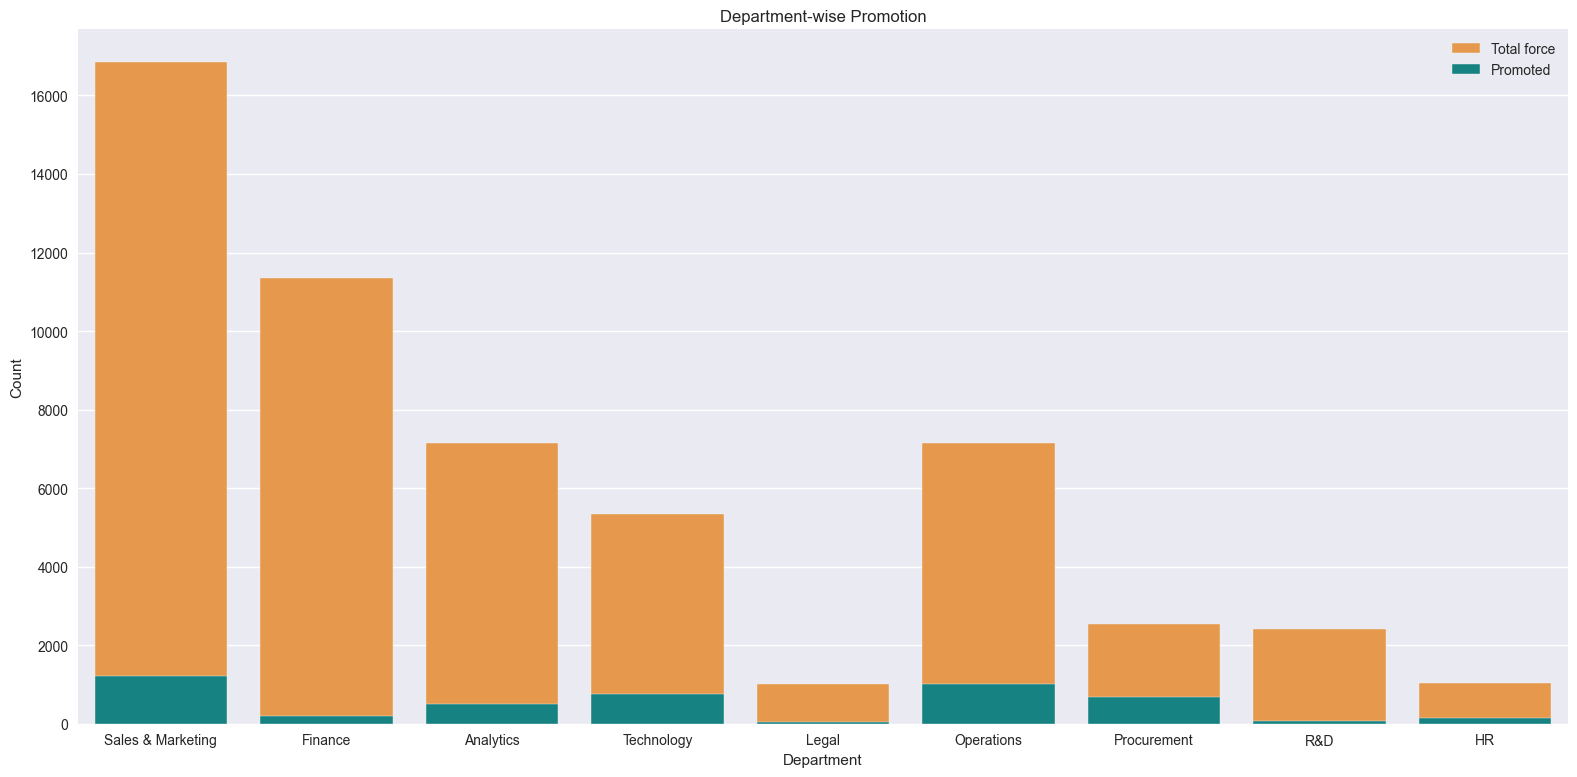

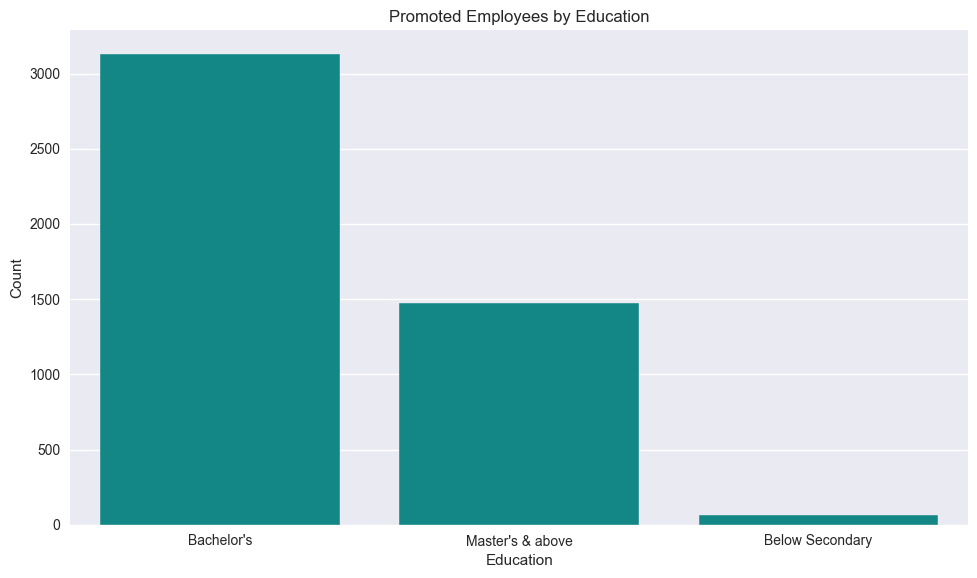

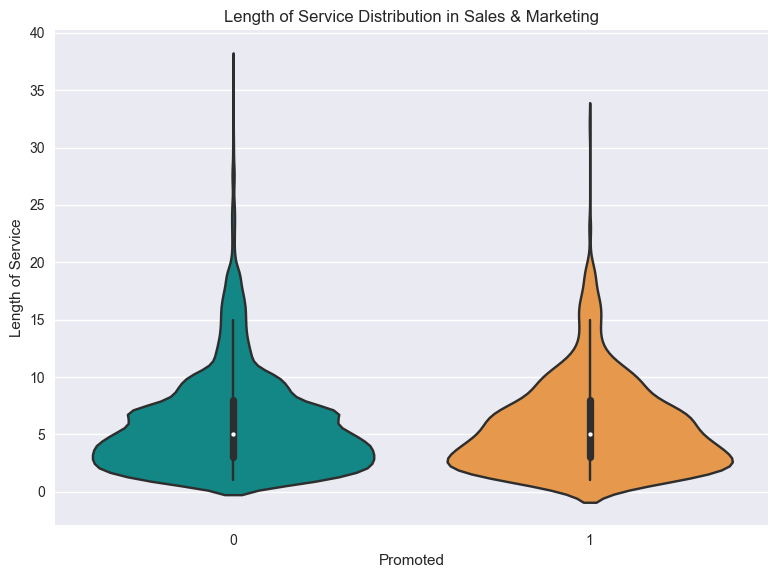

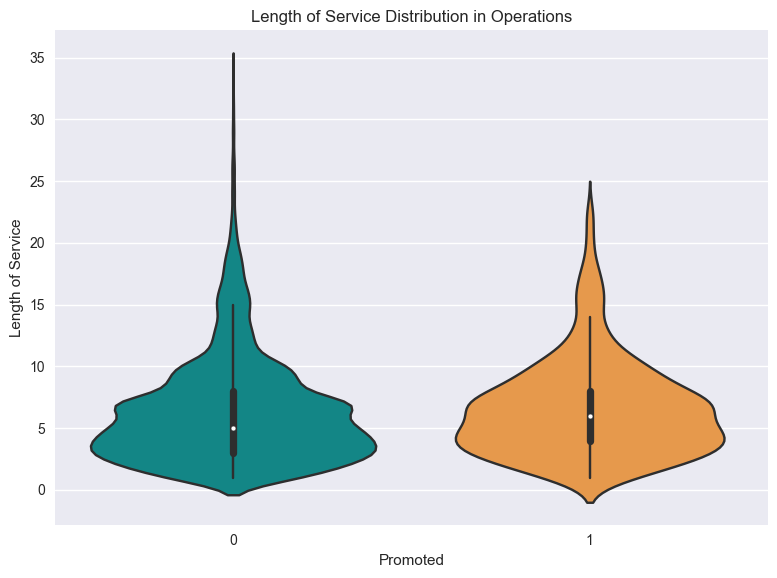

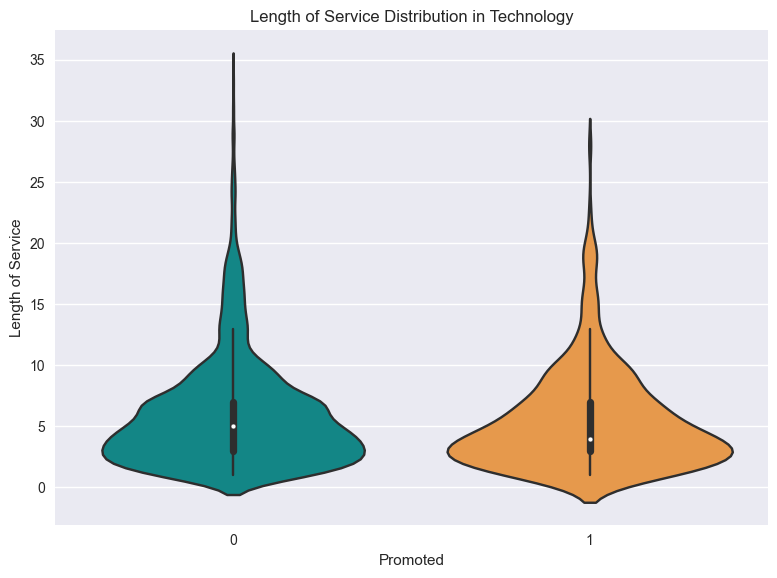

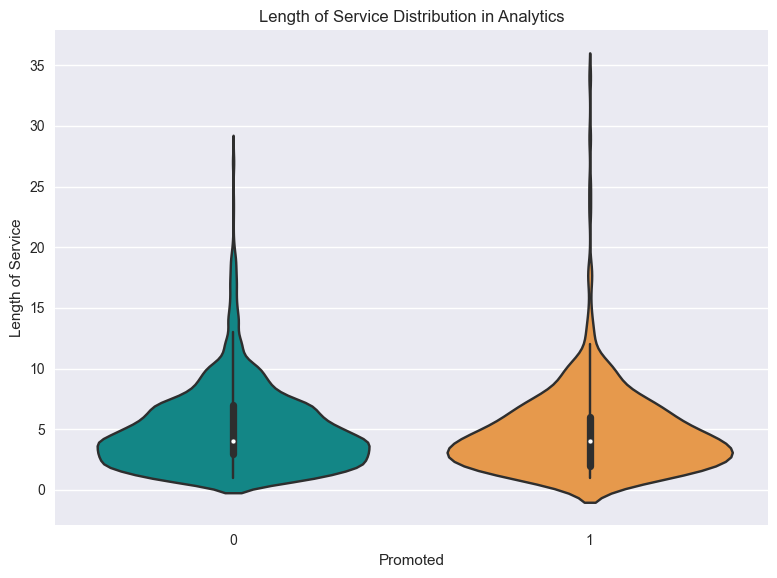

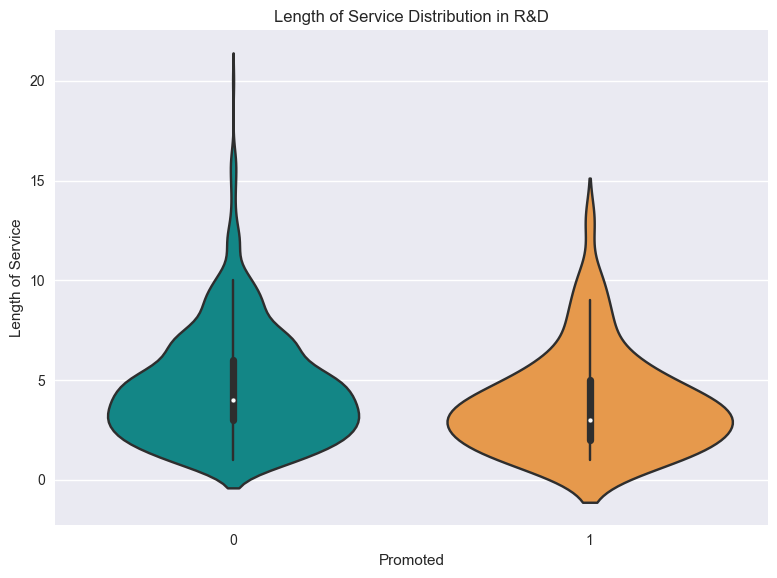

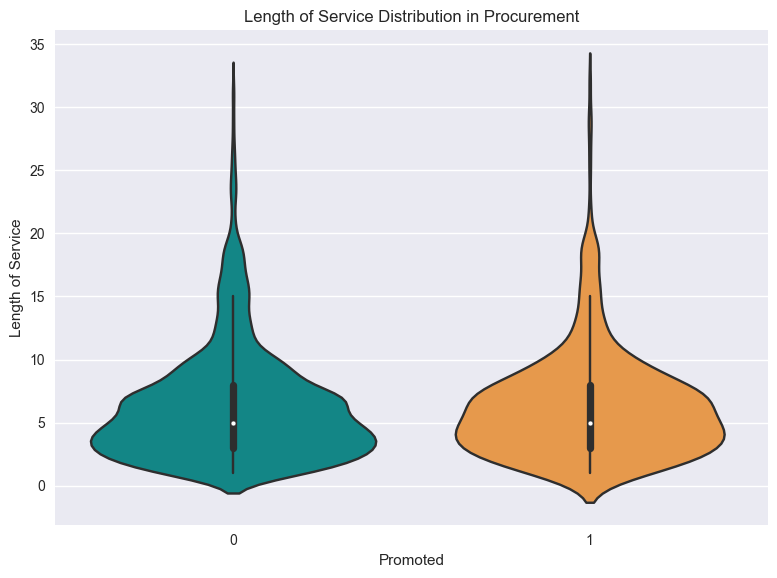

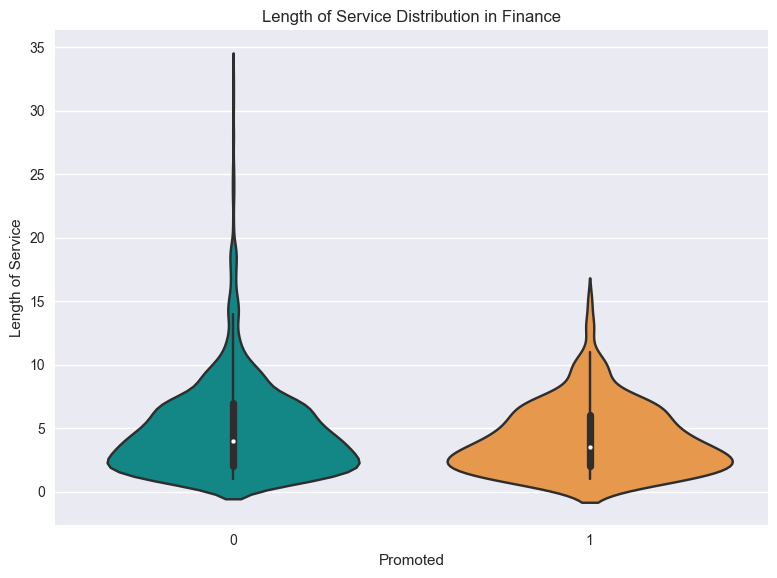

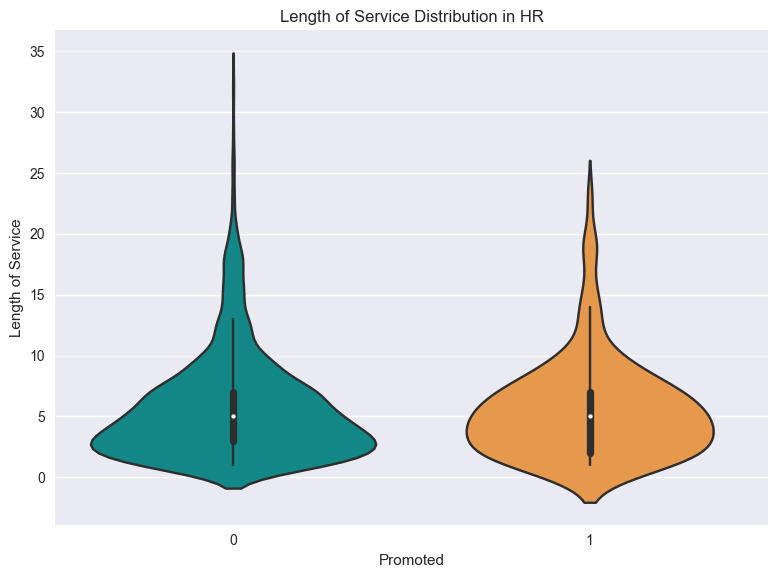

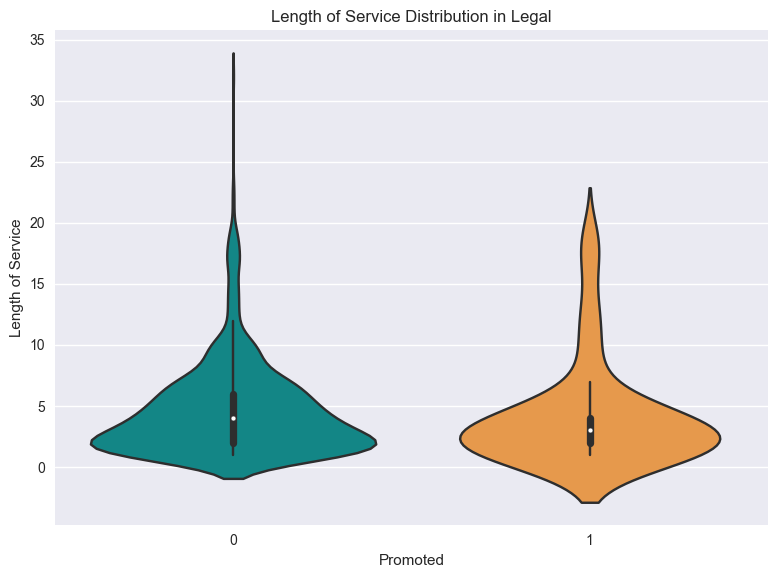

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
plt.style.use('seaborn')

# Plot 1: Bar plot for department counts
plt.figure(figsize=(16, 8))
sns.countplot(x='department', data=df, color='#ff9933')
sns.countplot(x='department', data=df[df['is_promoted'] == 1], color='#009999', saturation=0.7)
plt.legend(['Total force', 'Promoted'])
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department-wise Promotion')

plt.tight_layout()
plt.show()

# Plot 2: Bar plot for promoted employees by education
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df[df['is_promoted'] == 1], color='#009999')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Promoted Employees by Education')

plt.tight_layout()
plt.show()

# Loop over unique departments to create violin plots
for dept in df['department'].unique():
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='is_promoted', y='length_of_service', data=df[df['department'] == dept], palette=['#009999', '#ff9933'])
    plt.title(f'Length of Service Distribution in {dept}')
    plt.xlabel('Promoted')
    plt.ylabel('Length of Service')
    plt.tight_layout()
    plt.show()


In [41]:
rm_cols = [
    'employee_id',
    'department',
    'region',
    'education',
    'gender',
    'recruitment_channel',
    'KPIs_met',
    'awards_won',
    'total_score_label',
    'service_catg',
    'age_label',
    'rating_label'
]

df.drop(rm_cols,axis=1,inplace=True)
df.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score,is_promoted,performance,total_score
0,1,35,5.0,8,49,0,True,49
1,1,30,5.0,4,60,0,False,60
2,1,34,3.0,7,50,0,False,50
3,2,39,1.0,10,50,0,False,100
4,1,45,3.0,2,73,0,False,73


In [42]:
df.performance = df.performance.apply(lambda x: 1 if x else 0)

is_promoted
0    50140
1     4668
Name: count, dtype: int64


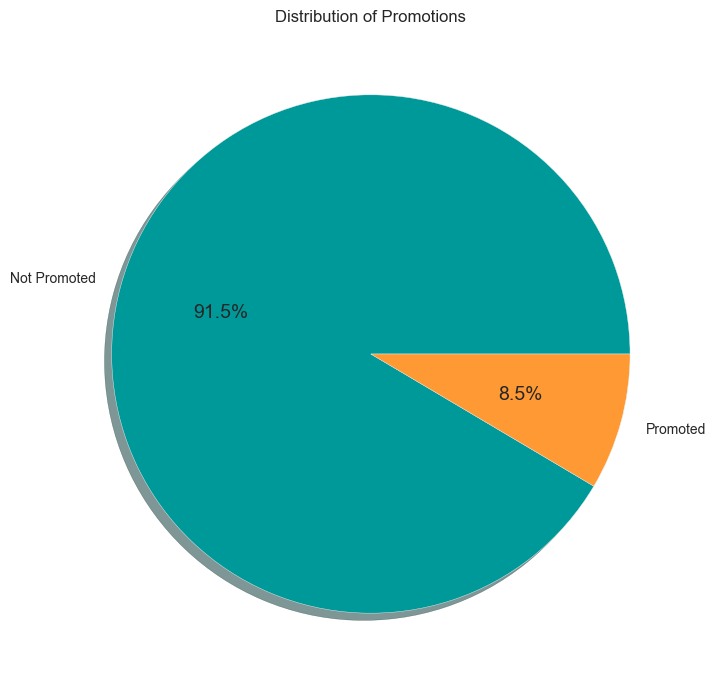

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print(df.is_promoted.value_counts())

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df.is_promoted.value_counts(), labels=['Not Promoted', 'Promoted'], autopct='%1.1f%%', colors=['#009999', '#ff9933'], shadow=True)
plt.title('Distribution of Promotions')
plt.show()


In [44]:
X = df.drop('is_promoted',axis=1)
y = df.is_promoted

cols = X.columns

resampler = RandomOverSampler(random_state=1)
X_res,y_res = resampler.fit_resample(X,y)
print(X_res.shape)
print(y_res.value_counts())

(100280, 7)
is_promoted
0    50140
1    50140
Name: count, dtype: int64


In [45]:
scaler = MinMaxScaler()
X_res = pd.DataFrame(scaler.fit_transform(X_res))
X_res.head(5)

,0,1,2,3,4,5,6
0,0.000000,0.375,1.0,0.194444,0.166667,1.0,0.014903
1,0.000000,0.250,1.0,0.083333,0.350000,0.0,0.031297
2,0.000000,0.350,0.6,0.166667,0.183333,0.0,0.016393
3,0.111111,0.475,0.2,0.250000,0.183333,0.0,0.090909
4,0.000000,0.625,0.6,0.027778,0.566667,0.0,0.050671


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=0)

In [47]:
scores = cross_validate(
    GradientBoostingClassifier(max_depth=10,random_state=0),
    X_res,
    y_res,
    cv=5,
    scoring=['accuracy','precision_macro','recall_macro','f1'],
    verbose=2
)
print('Avg Test score: ',np.mean(scores['test_accuracy']))
print('Avg Precision: ',np.mean(scores['test_precision_macro']))
print('Avg Recall: ',np.mean(scores['test_recall_macro']))
print('Avg F1 score: ',np.mean(scores['test_f1']))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  27.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.9s remaining:    0.0s


[CV] END .................................................... total time=  30.5s
[CV] END .................................................... total time=  31.6s
[CV] END .................................................... total time=  29.9s
[CV] END .................................................... total time=  34.0s
Avg Test score:  0.8737534902273634
Avg Precision:  0.8853820653547254
Avg Recall:  0.8737534902273634
Avg F1 score:  0.8838437034348153


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished


In [48]:
params = np.arange(10,26,1)
scores = validation_curve(
    GradientBoostingClassifier(),
    X_res,
    y_res,
    param_name='max_depth',
    param_range=params,
    scoring='accuracy',
    verbose=3,
    cv=3
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ......max_depth=10;, score=(train=0.899, test=0.873) total time=  24.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s remaining:    0.0s


[CV] END ......max_depth=11;, score=(train=0.928, test=0.896) total time=  35.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV] END ......max_depth=12;, score=(train=0.948, test=0.915) total time=  46.0s
[CV] END ......max_depth=13;, score=(train=0.965, test=0.932) total time=  46.7s
[CV] END ......max_depth=14;, score=(train=0.971, test=0.940) total time=  51.9s
[CV] END ......max_depth=15;, score=(train=0.974, test=0.945) total time=  51.6s
[CV] END ......max_depth=16;, score=(train=0.974, test=0.947) total time=  59.4s
[CV] END ......max_depth=17;, score=(train=0.974, test=0.950) total time= 1.1min
[CV] END ......max_depth=18;, score=(train=0.974, test=0.950) total time= 1.4min
[CV] END ......max_depth=19;, score=(train=0.974, test=0.950) total time= 1.5min
[CV] END ......max_depth=20;, score=(train=0.974, test=0.950) total time= 2.1min
[CV] END ......max_depth=21;, score=(train=0.974, test=0.950) total time= 2.1min
[CV] END ......max_depth=22;, score=(train=0.974, test=0.949) total time= 2.0min
[CV] END ......max_depth=23;, score=(train=0.974, test=0.950) total time= 2.0min
[CV] END ......max_depth=24;

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 68.3min finished


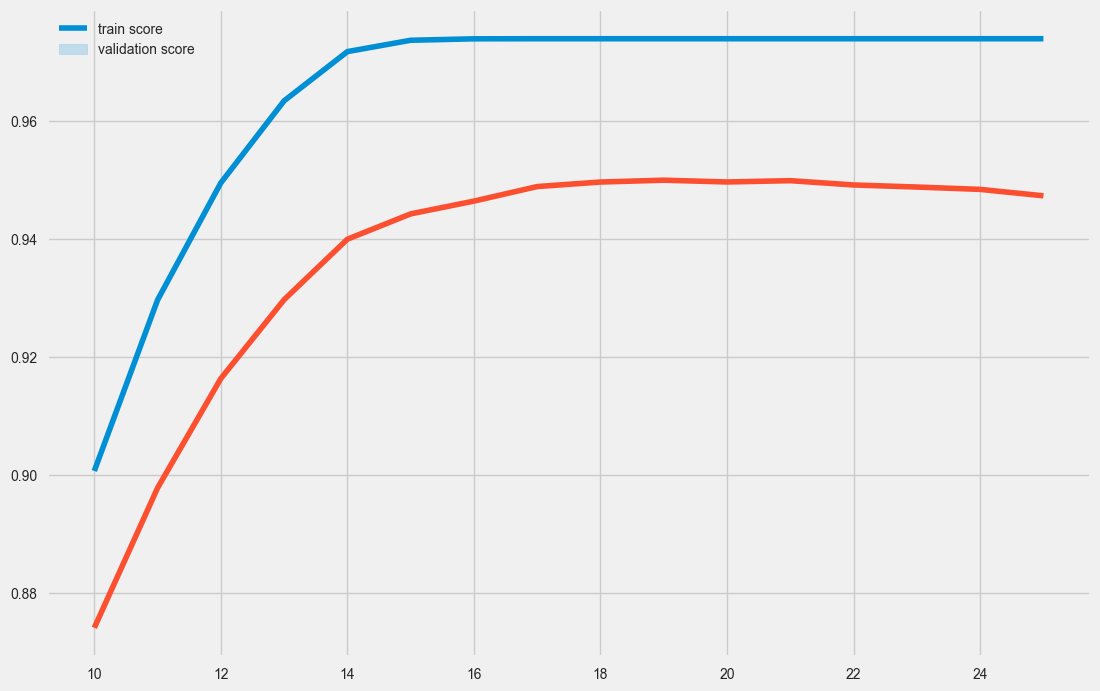

In [49]:
train_scores = scores[0]
test_scores = scores[1]

train_means = np.mean(train_scores,axis=1)
test_means = np.mean(test_scores,axis=1)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.lineplot(x=params,y=train_means)
sns.lineplot(x=params,y=test_means)
plt.legend(['train score','validation score'])

In [37]:
# Initialize the imputer with the desired strategy (e.g., mean, median, most frequent)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to fill missing values in your input data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=0)
svm_model.fit(X_train_imputed, y_train)

# Evaluate the model
train_accuracy = svm_model.score(X_train_imputed, y_train)
test_accuracy = svm_model.score(X_test_imputed, y_test)

# Print the training and test accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.905054052821238
Test Accuracy: 0.9098704615945995
